# "Lab:" *Solving Linear Systems Using Row Reductions*

This class requires NO CODING, i.e. this kind of lab nonsense will not show up on the exams.  However, LIFE as an applied mathematician, engineer, computer scientist, etc... tends to require coding skills.

Hence, the **Purpose** of these "labs" are
* To **provide Linear Algebra examples** that are modifiable, and potentially, interactive
* To **expose** those who are interested to some python code examples;

The **"Rules"**
* The labs are are highly experimental and are for *Adults and Entertainment Purposes Only*
* The code is sometimes (always?) crude, and should not be taken an example of Good Coding Standards[TM]
* The labs "live" at http://terminus.sdsu.edu/SDSU/Math254/PythonLabs/
* The labs are developed for *Math 254 : Introduction to Linear Algebra* at San Diego State University
* The labs are provided free of cost, with a full money-back guarantee

**Copyright, and License**
* Copyright (C) 2019 : Peter Blomgren <blomgren.peter@gmail.com>.
* License: [GNU General Public License, version 3](https://en.wikipedia.org/wiki/GNU_General_Public_License)

**Interactive or Static Mode???**
* If you are using the static link which means you are using https://nbviewer.jupyter.org/, you are looking at the notebook Inputs and Outputs, and you cannot modify or interact in any way with the notebook.
* If you have downloaded the notebook and are viewing it some other way --- $(\infty-1)$ possibilities, you can step through each code-block one-step-at-a-time by pressing [shift]+[enter], if you want to do this without installing anything on your computer one option is to use [mybinder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb) (surely, this will break at some point), or [Google/colab](https://colab.research.google.com).

### *(In interactive mode)* Press [shift]+[enter] to step through the blocks one at a time

In [1]:
# Import basic python packages for numerical computation (numpy),
# symbolic computations (sympy), and plotting (matplotlib)
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# cm are colormaps -- for plotting
from matplotlib import cm

# mplot3d is needed for 3D-plotting
from mpl_toolkits import mplot3d

#(not needed in this lab) from matplotlib.ticker import LinearLocator, FormatStrFormatter
#(not needed in this lab) from mpl_toolkits.mplot3d import Axes3D

## *"What, is like, your problem... maaaan?!?"*
Our problem of interest is
$\begin{bmatrix}
x &+& 2y &+& 3z \\
x &+& 3y &+& 2z \\
3x &+& 2y &+& z
\end{bmatrix} = \begin{bmatrix} 39 \\ 34 \\ 26 \end{bmatrix}$


In [2]:
# First we designate x, y, z as symbols (rather than variables)
x, y, z = sp.symbols('x y z')

# Next, we define veriables for each row
# Note that we have subtracted the right-hand-side
# so that we are looking for solutions to Row{1,2,3} = 0
Row1 = x + 2*y + 3*z - 39
Row2 = x + 3*y + 2*z - 34
Row3 = 3*x + 2*y + z - 26

# Lets look at what we have
print('Row1 contains: ',Row1)
print('Row2 contains: ',Row2)
print('Row3 contains: ',Row3)

Row1 contains:  x + 2*y + 3*z - 39
Row2 contains:  x + 3*y + 2*z - 34
Row3 contains:  3*x + 2*y + z - 26


In [3]:
# Now we can easily do thing like combine rows:
Row2 - Row1

y - z + 5

In [4]:
Row3 - 3*Row1

-4*y - 8*z + 91

In [5]:
# But, in order to solve the problem we have to update the Rows:
Row2 = Row2 - Row1
Row3 = Row3 - 3*Row1

In [6]:
# Lets look at how thw rows have changed
print('Row1 contains: ',Row1)
print('Row2 contains: ',Row2)
print('Row3 contains: ',Row3)

Row1 contains:  x + 2*y + 3*z - 39
Row2 contains:  y - z + 5
Row3 contains:  -4*y - 8*z + 91


In [7]:
# We can now use Row1 to eliminate all "y"s from Row1 and Row3
Row1 = Row1 - 2*Row2
Row3 = Row3 + 4*Row2
print('Row1 contains: ',Row1)
print('Row2 contains: ',Row2)
print('Row3 contains: ',Row3)

Row1 contains:  x + 5*z - 49
Row2 contains:  y - z + 5
Row3 contains:  111 - 12*z


In [8]:
# Next, we rescale Row3 so that the leading coefficient is 1
# The opeattion "/=" is short-hand for Row3 = Row3 / -12
Row3 /= -12
print('Row3 contains: ',Row3)

Row3 contains:  z - 37/4


In [9]:
# Now, we eliminate z from Row1 and Row2
Row1 -= 5*Row3
Row2 += Row3
print('Row1 contains: ',Row1)
print('Row2 contains: ',Row2)
print('Row3 contains: ',Row3)

Row1 contains:  x - 11/4
Row2 contains:  y - 17/4
Row3 contains:  z - 37/4


In [10]:
# The purpose of this class is to learn HOW the linear algebra operations
# work, and what information we can learn from matrices, vectors, etc...
#
# If we only care about the answer, we can let the computer do all the work
# --- This may be useful for checking your answers, but MAKE SURE *YOU* KNOW
#     how to solve the problems by hand... you cannot bring a computer to the
#     exams!
#
A = [[1, 2, 3], [1, 3, 2], [3, 2, 1]]
b = [39, 34, 26]
x = np.linalg.solve(A,b)
print(f'The solution is, x={x[0]:.2f}, y={x[1]:.2f}, z={x[2]:.2f}')

The solution is, x=2.75, y=4.25, z=9.25


In [11]:
# Lets visulize what we're doing...
#
# Going back to the original rows, we solve for x in terms of (y,z)
# for each row; we define a function for each row:
def r11(y,z):
    x = 39 - 2*y - 3*z
    return(x)

def r21(y,z):
    x = 34 -3*y - 2*z
    return(x)

def r31(y,z):
    x = (26 - 2*y - z)/3.0
    return(x)

In [12]:
# Now, we let y and z contain 21 values between -2 and 2
# and Y, and Z contain 21x21=441 entries so that pairs from
# Y and Z give us all the point in the square [-2,2]x[-2,2]
N = 21
M = 10
y = np.linspace(-20, 20, N)
z = np.linspace(-20, 20, N)
Y, Z = np.meshgrid(y, z)

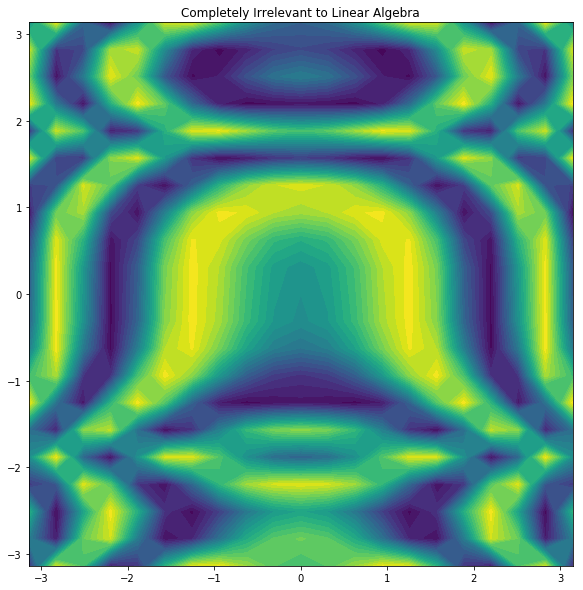

In [13]:
# We can use the grid to plot functions of (y,z)... like x=sin(y^2+z^3):
#
X = np.sin((np.pi/20*Y)**2 + (np.pi/20*Z)**3)
plt.close('all')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.contourf((np.pi/20*Y), (np.pi/20*Z), X, 25)
ax1.set_aspect(aspect=1)
ax1.set_title('Completely Irrelevant to Linear Algebra')
plt.show()

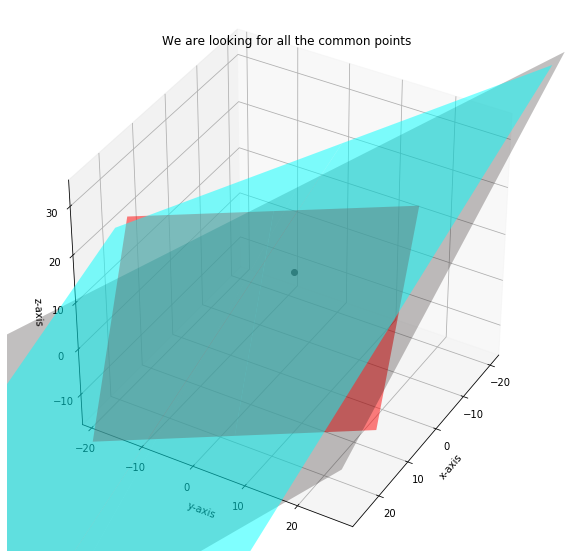

In [14]:
# Let's get the x-values corresponding to the 3 rows...
X1 = r11(Y,Z)
X2 = r21(Y,Z)
X3 = r31(Y,Z)

fig2 = plt.figure(figsize=(10,10))
ax2 = plt.axes(projection='3d')
ax2.plot_surface(X1, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5, rstride=100)
ax2.plot_surface(X2, Y, Z, cmap=cm.hot, linewidth=0, alpha=0.25, rstride=100)
ax2.plot_surface(X3, Y, Z, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.set_zlabel('z-axis')
EL=37.5
AZ=30
ax2.view_init(elev=EL, azim=AZ)
ax2.plot([2.75], [4.25], [9.25], 'ko')
ax2.set_xlim(2.75-25,2.75+25)
ax2.set_ylim(4.25-25,4.25+25)
ax2.set_zlim(9.25-25,9.25+25)
ax2.set_title('We are looking for all the common points')
plt.show()

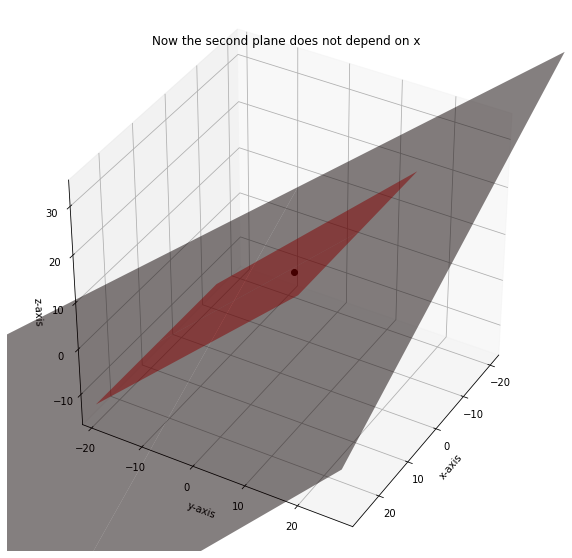

In [15]:
# As we go through the row-reduction steps, the planes start aligning with the coordinate axes
# Lets look at Row2 before and after we have removed the dependence on x 

def r22(z):
    y = z - 5
    return(y)

Y2 = r22(Z)

fig3 = plt.figure(figsize=(10,10))
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X2, Y, Z, cmap=cm.hot, linewidth=0, alpha=0.5, rstride=100,)
ax3.plot_surface(Y, Y2, Z, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax3.set_xlabel('x-axis')
ax3.set_ylabel('y-axis')
ax3.set_zlabel('z-axis')
ax3.view_init(elev=EL, azim=AZ)
ax3.plot([2.75], [4.25], [9.25], 'ko')
ax3.set_xlim(2.75-25,2.75+25)
ax3.set_ylim(4.25-25,4.25+25)
ax3.set_zlim(9.25-25,9.25+25)
ax3.set_title('Now the second plane does not depend on x')
plt.show()

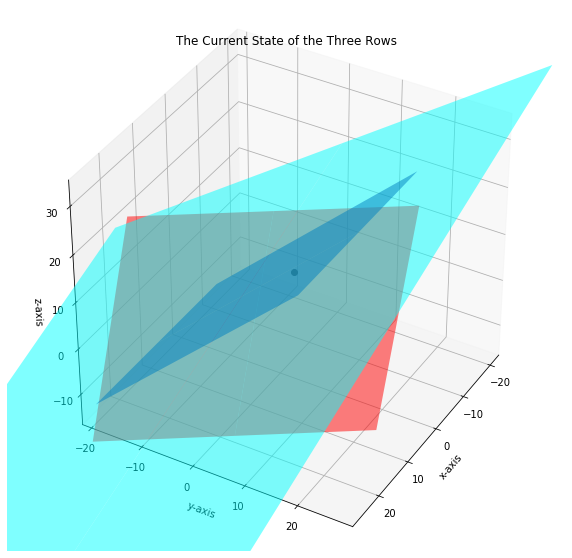

In [16]:
# Lets look at Row2 before and after we have removed the dependence on x 

fig4 = plt.figure(figsize=(10,10))
ax4 = plt.axes(projection='3d')
ax4.plot_surface(X1, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5, rstride=100)
ax4.plot_surface(Y, Y2, Z, cmap=cm.jet, linewidth=0, alpha=0.5, rstride=100)
ax4.plot_surface(X3, Y, Z, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax4.set_xlabel('x-axis')
ax4.set_ylabel('y-axis')
ax4.set_zlabel('z-axis')
ax4.view_init(elev=EL, azim=AZ)
ax4.plot([2.75], [4.25], [9.25], 'ko')
ax4.set_xlim(2.75-25,2.75+25)
ax4.set_ylim(4.25-25,4.25+25)
ax4.set_zlim(9.25-25,9.25+25)
ax4.set_title('The Current State of the Three Rows')
print()

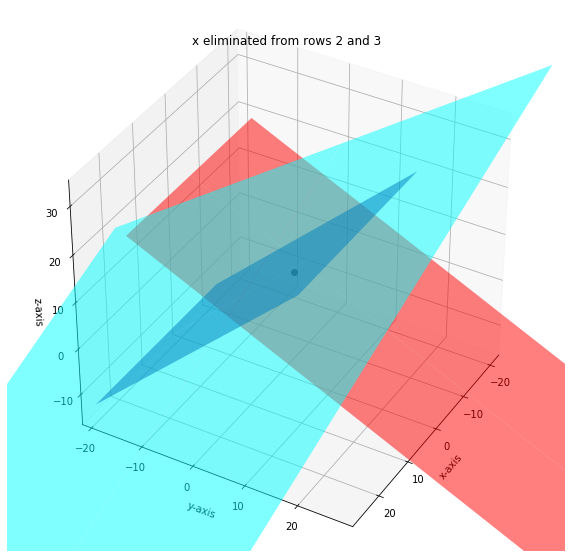

In [17]:
# This is the equation for Row3, after elimination of x
def r32(z):
    y = (-8*z+91)/4
    return(y)

Y3 = r32(Z)

fig5 = plt.figure(figsize=(10,10))
ax5 = plt.axes(projection='3d')
ax5.plot_surface(X1, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5, rstride=100)
ax5.plot_surface(Y, Y2, Z, cmap=cm.jet, linewidth=0, alpha=0.5, rstride=100)
ax5.plot_surface(Y, Y3, Z, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax5.set_xlabel('x-axis')
ax5.set_ylabel('y-axis')
ax5.set_zlabel('z-axis')
ax5.view_init(elev=EL, azim=AZ)
ax5.plot([2.75], [4.25], [9.25], 'ko')
ax5.set_xlim(2.75-25,2.75+25)
ax5.set_ylim(4.25-25,4.25+25)
ax5.set_zlim(9.25-25,9.25+25)
ax5.set_title('x eliminated from rows 2 and 3')
plt.show()

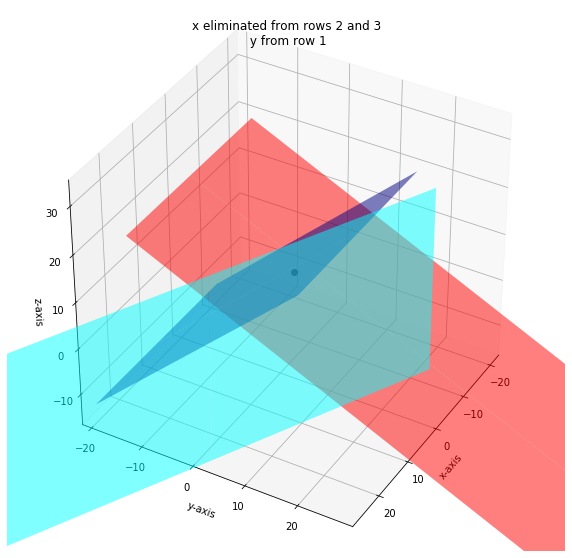

In [18]:
# This is the equation for Row1, after elimination of y
def r12(z):
    x = -5*z + 49
    return(y)

X2 = r32(Y)

fig6 = plt.figure(figsize=(10,10))
ax6 = plt.axes(projection='3d')
ax6.plot_surface(X2, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5, rstride=100)
ax6.plot_surface(Y, Y2, Z, cmap=cm.jet, linewidth=0, alpha=0.5, rstride=100)
ax6.plot_surface(Y, Y3, Z, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax6.set_xlabel('x-axis')
ax6.set_ylabel('y-axis')
ax6.set_zlabel('z-axis')
ax6.view_init(elev=EL, azim=AZ)
ax6.plot([2.75], [4.25], [9.25], 'ko')
ax6.set_xlim(2.75-25,2.75+25)
ax6.set_ylim(4.25-25,4.25+25)
ax6.set_zlim(9.25-25,9.25+25)
ax6.set_title('x eliminated from rows 2 and 3\n y from row 1')
plt.show()

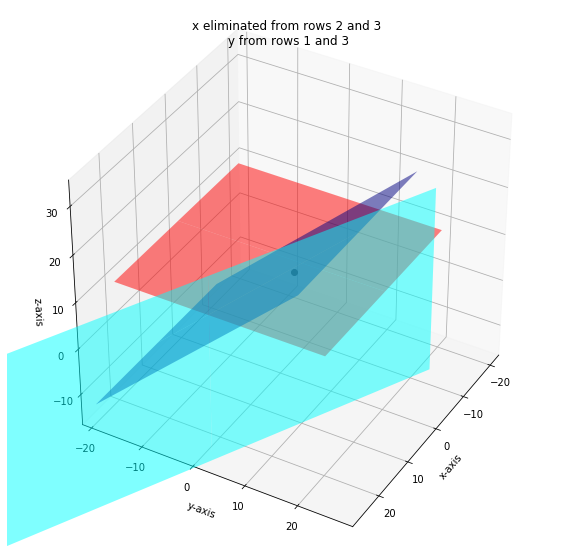

In [19]:
# This is the equation for Row3, after elimination of x and y
def r33(x):
    z = 9.25 + 0*x
    return(z)

Z3 = r33(X)

fig7 = plt.figure(figsize=(10,10))
ax7 = plt.axes(projection='3d')
ax7.plot_surface(X2, Y, Z, cmap=cm.cool, linewidth=1, alpha=0.5, rstride=100)
ax7.plot_surface(Y, Y2, Z, cmap=cm.jet, linewidth=1, alpha=0.5, rstride=100)
ax7.plot_surface(Y, Z, Z3, cmap=cm.hsv, linewidth=1, alpha=0.5, rstride=100)
ax7.set_xlabel('x-axis')
ax7.set_ylabel('y-axis')
ax7.set_zlabel('z-axis')
ax7.view_init(elev=EL, azim=AZ)
ax7.plot([2.75], [4.25], [9.25], 'ko')
ax7.set_xlim(2.75-25,2.75+25)
ax7.set_ylim(4.25-25,4.25+25)
ax7.set_zlim(9.25-25,9.25+25)
ax7.set_title('x eliminated from rows 2 and 3\n y from rows 1 and 3')
plt.show()

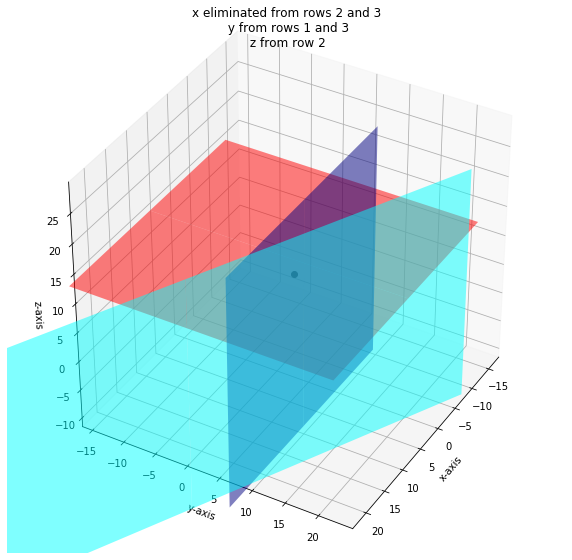

In [20]:
# This is the equation for Row2, after elimination of x and z
def r23(x):
    y = 4.25 + 0*x
    return(y)

Y3 = r23(X)

fig8 = plt.figure(figsize=(10,10))
ax8 = plt.axes(projection='3d')
ax8.plot_surface(X2, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5, rstride=100)
ax8.plot_surface(Y, Y3, Z, cmap=cm.jet, linewidth=0, alpha=0.5, rstride=100)
ax8.plot_surface(Y, Z, Z3, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax8.set_xlabel('x-axis')
ax8.set_ylabel('y-axis')
ax8.set_zlabel('z-axis')
ax8.view_init(elev=EL, azim=AZ)
ax8.plot([2.75], [4.25], [9.25], 'ko')
ax8.set_xlim(2.75-20,2.75+20)
ax8.set_ylim(4.25-20,4.25+20)
ax8.set_zlim(9.25-20,9.25+20)
ax8.set_title('x eliminated from rows 2 and 3\n y from rows 1 and 3\n z from row 2')
plt.show()

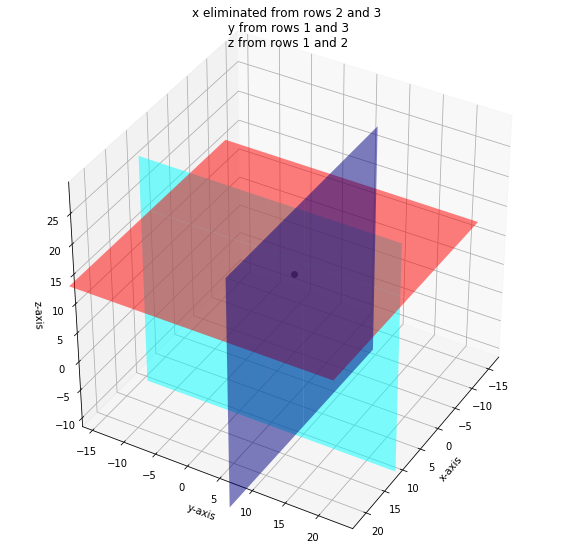

In [21]:
# This is the equation for Row1, after elimination of y and z
def r13(y):
    x = 2.25 + 0*y
    return(x)

X3 = r13(Y)

fig9 = plt.figure(figsize=(10,10))
ax9 = plt.axes(projection='3d')
ax9.plot_surface(X3, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5, rstride=100)
ax9.plot_surface(Y, Y3, Z, cmap=cm.jet, linewidth=0, alpha=0.5, rstride=100)
ax9.plot_surface(Y, Z, Z3, cmap=cm.hsv, linewidth=0, alpha=0.5, rstride=100)
ax9.set_xlabel('x-axis')
ax9.set_ylabel('y-axis')
ax9.set_zlabel('z-axis')
ax9.view_init(elev=EL, azim=AZ)
ax9.plot([2.75], [4.25], [9.25], 'ko')
ax9.set_xlim(2.75-20,2.75+20)
ax9.set_ylim(4.25-20,4.25+20)
ax9.set_zlim(9.25-20,9.25+20)
ax9.set_title('x eliminated from rows 2 and 3\n y from rows 1 and 3\n z from rows 1 and 2')
plt.show()